# **2. EDA and Data Cleaning**

In [166]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

In [4]:
# Run function on WallStreetBets data
wsb = post_aggregator('wallstreetbets')

In [5]:
# Preview of df and size
print(wsb.shape)
wsb.head()

(2611, 4)


,created_utc,title,self_text,subreddit
0,1.697755e+09,Elon Musk loses $24 billion after Tesla stock ...,,wallstreetbets
1,1.697753e+09,Mom I'm rich,I never really gamble much but I saw bonds sur...,wallstreetbets
2,1.697753e+09,"Powell Says Fed ‘Proceeding Carefully,’ Leaves...",,wallstreetbets
3,1.697753e+09,Please post Tesla loss porn,I have nothing to nut to,wallstreetbets
4,1.697752e+09,It is worse than 2008!,Convoy that was seen was the market disruptor ...,wallstreetbets


In [6]:
# Save data as .csv
wsb.to_csv('data/wsb_raw.csv', index=False)

### Read in data and perform preliminary analysis

In [101]:
# Import data
df = pd.read_csv('data/agg_data_wsb_cms.csv')
reddit = df[['subreddit', 'text']]
print(reddit.shape)
reddit.head()

(5271, 2)


,subreddit,text
0,1,PonyShibaInu - an adorable unique hybrid of Sh...
1,1,While you hunt meme and trashcoins Amazon rele...
2,1,Could $CUMINU $8m mc beat OnlyFans valued at $...
3,1,The Revolutionary Arsenal 2.0: Elevating Your ...
4,1,Qtum Strikes the Perfect Balance: The Blockcha...


In [102]:
# Data is roughly evenly split between cms and wsb
reddit.subreddit.value_counts(normalize=True)

subreddit
1    0.504838
0    0.495162
Name: proportion, dtype: float64

In [103]:
# No NA values
reddit.isna().sum()

subreddit    0
text         0
dtype: int64

### __WSB__: Preliminary NLP Analysis

In [106]:
# Import WSB data
wsb = pd.read_csv('data/wsb_raw.csv')

In [107]:
# Find length and word count in title of each post
wsb['title_len'] = [len(i) for i in wsb['title']]
wsb['title_words'] = [len(i.split()) for i in wsb['title']]
wsb.head()

,created_utc,title,self_text,subreddit,text,title_len,title_words
0,1.697760e+09,Most Anticipated Earnings Releases for the wee...,NaN,wallstreetbets,Most Anticipated Earnings Releases for the wee...,76,11
1,1.697759e+09,Robinhood Assignment. What are my options ?,\n So I had some credit spreads on spy expirin...,wallstreetbets,Robinhood Assignment. What are my options ? \n...,43,7
2,1.697758e+09,Calls on $TSLA?,NaN,wallstreetbets,Calls on $TSLA?,15,3
3,1.697757e+09,Can we get a gamma $BIG,NaN,wallstreetbets,Can we get a gamma $BIG,23,6
4,1.697757e+09,ServiceNow Earnings,What are everyone's feelings on servicenow ear...,wallstreetbets,ServiceNow Earnings What are everyone's feelin...,19,2


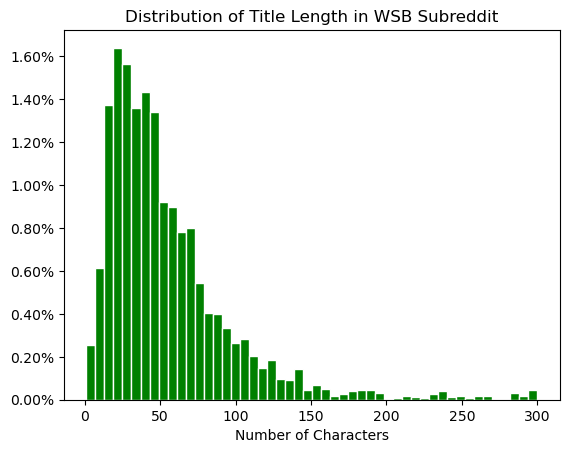

In [149]:
# Distribution of Title Length (Characters)
plt.hist(wsb['title_len'], bins = 50, color = 'green', edgecolor = 'white', density = True)
plt.title('Distribution of Title Length in WSB Subreddit')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Number of Characters')
plt.savefig('imgs/WSBtitledistrb.png', dpi = 192);

In [108]:
# Find mean
print(f'WSB has a mean title length of {round(wsb.title_len.mean(), 1)} characters.')
print(f'WSB has a mean number of title words of {round(wsb.title_words.mean(), 1)} words.')

WSB has a mean title length of 54.5 characters.
WSB has a mean number of title words of 10.0 words.


In [109]:
# Find 5 shortest titles
wsb.sort_values('title_len').head()

,created_utc,title,self_text,subreddit,text,title_len,title_words
1974,1.633049e+09,😂,NaN,wallstreetbets,😂,1,1
1792,1.642891e+09,🚀,NaN,wallstreetbets,🚀,1,1
2414,1.679372e+09,🥲,NaN,wallstreetbets,🥲,1,1
2537,1.654633e+09,😎,NaN,wallstreetbets,😎,1,1
558,1.696624e+09,🌈🐻,Where yall at? Yall were mad loud yesterday. A...,wallstreetbets,🌈🐻 Where yall at? Yall were mad loud yesterday...,2,1


In [110]:
# Find 5 longest titles
wsb.sort_values('title_len').tail()

,created_utc,title,self_text,subreddit,text,title_len,title_words
2409,1.631565e+09,"2 years ago, I Yolo’d my entire life savings i...",NaN,wallstreetbets,"2 years ago, I Yolo’d my entire life savings i...",296,53
1001,1.612611e+09,"I hate to ruin everyone's good time, but someo...",NaN,wallstreetbets,"I hate to ruin everyone's good time, but someo...",297,58
1494,1.612387e+09,LYG is a bet on the UK economy. COVID is behin...,NaN,wallstreetbets,LYG is a bet on the UK economy. COVID is behin...,300,59
1478,1.642170e+09,Party's over! CPI +10% on existing inflation +...,"MLK day Monday, the rest of the world will be ...",wallstreetbets,Party's over! CPI +10% on existing inflation +...,300,50
1727,1.611967e+09,"Huge shoutout to Kevin O'Leary: ""Definition of...",NaN,wallstreetbets,"Huge shoutout to Kevin O'Leary: ""Definition of...",300,55


### Top 15 words, bigrams and trigrams

In [111]:
# Set X and y variables
X = wsb['text']
y = wsb['subreddit']

In [112]:
# Top 15 words in WSB subreddit
# Change stop_words = 'english' with my additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words))
cvec.fit(X)

CountVectorizer(stop_words=['been', 'him', 'thereafter', 'top', 'very', 'full',
                            'though', 'besides', 'eight', 'detail', 'may',
                            'couldnt', 'every', 'sometime', 'namely', 'too',
                            'as', 'please', 'seem', 'is', 'below', 'alone',
                            'behind', 'enough', 'cry', 'most', 'none', 'mine',
                            'thereby', 'what', ...])

In [113]:
# Transform the corpus
X_cvec = cvec.transform(X)

# Convert X to dataframe
X_df = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names_out())

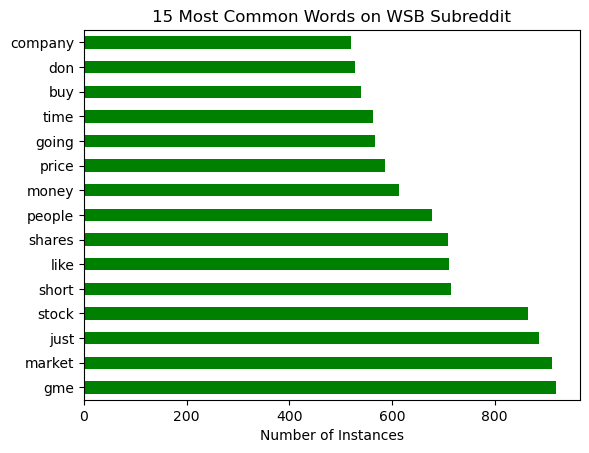

In [115]:
# Plot top occurring words 
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'green')
plt.title('15 Most Common Words on WSB Subreddit')
plt.xlabel('Number of Instances')
plt.savefig('imgs/WSBtop15words.png', dpi = 192);

In [156]:
# Top 15 bigrams in WSB subreddit
X = wsb['text']
y = wsb['subreddit']

# Change stop_words = 'english' with my additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words), ngram_range=(2, 2))
cvec.fit(X)

# Transform the corpus
X_cvec = cvec.transform(X)

# Convert X to dataframe
X_df = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names_out())

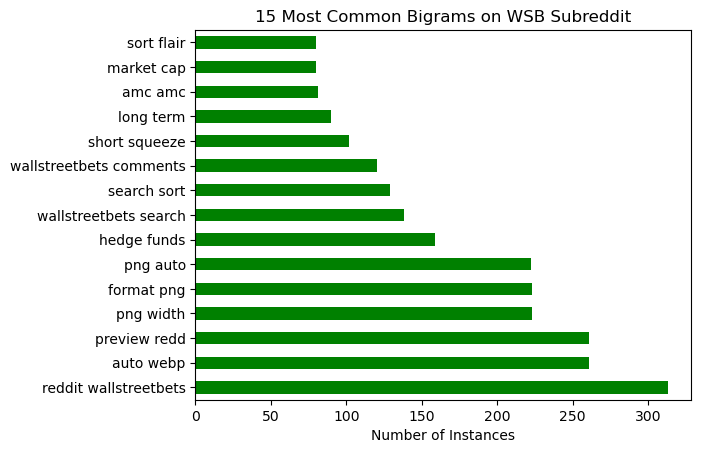

In [157]:
# Plot top occurring bigrams 
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'green')
plt.title('15 Most Common Bigrams on WSB Subreddit')
plt.xlabel('Number of Instances')
plt.savefig('imgs/WSBtop15bigrams.png', dpi = 192);

In [167]:
# Top 15 trigrams in WSB subreddit
X = wsb['text']
y = wsb['subreddit']

# Change stop_words = 'english' with my additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words), ngram_range=(3, 3))
cvec.fit(X)

# Transform the corpus
X_cvec = cvec.transform(X)

# Convert X to dataframe
X_df = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names_out())

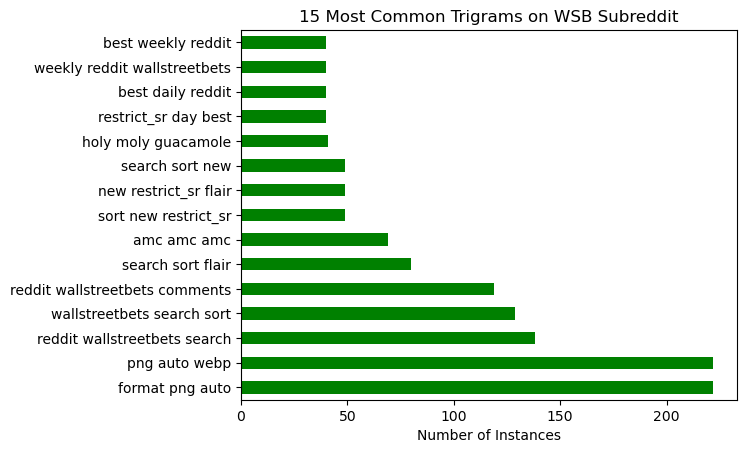

In [168]:
# Plot top occurring bigrams 
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'green')
plt.title('15 Most Common Trigrams on WSB Subreddit')
plt.xlabel('Number of Instances')
plt.savefig('imgs/WSBtop15trigrams.png', dpi = 192);

### __CMS__: NLP Preliminary Analysis

In [116]:
# Import CMS data
cms = pd.read_csv('data/cms_raw.csv')

In [117]:
# Find length and word count in title of each post
cms['title_len'] = [len(i) for i in cms['title']]
cms['title_words'] = [len(i.split()) for i in cms['title']]
cms.head()

,created_utc,title,self_text,subreddit,text,title_len,title_words
0,1.697750e+09,PonyShibaInu - an adorable unique hybrid of Sh...,Pony Shiba Inu is the hottest new meme coin in...,CryptoMoonShots,PonyShibaInu - an adorable unique hybrid of Sh...,62,11
1,1.697749e+09,While you hunt meme and trashcoins Amazon rele...,I recommend to read more on either https://euc...,CryptoMoonShots,While you hunt meme and trashcoins Amazon rele...,123,22
2,1.697746e+09,Could $CUMINU $8m mc beat OnlyFans valued at $...,Cummuniti the new 18+ platform will change the...,CryptoMoonShots,Could $CUMINU $8m mc beat OnlyFans valued at $...,161,28
3,1.697745e+09,The Revolutionary Arsenal 2.0: Elevating Your ...,"\nGamers and blockchain enthusiasts, hold on...",CryptoMoonShots,The Revolutionary Arsenal 2.0: Elevating Your ...,78,11
4,1.697740e+09,Qtum Strikes the Perfect Balance: The Blockcha...,The landscape of blockchain technology is cons...,CryptoMoonShots,Qtum Strikes the Perfect Balance: The Blockcha...,57,8


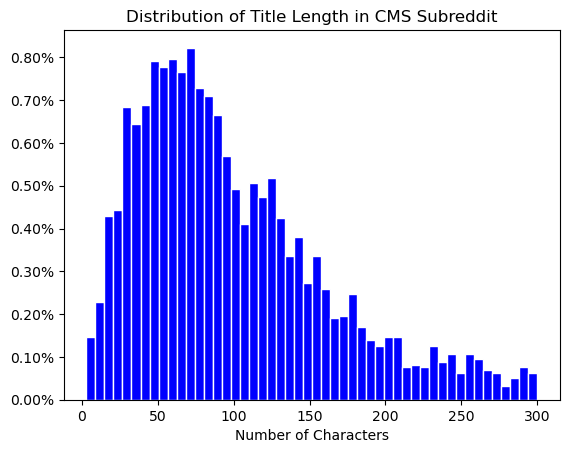

In [148]:
# Distribution of Title Length (Characters)
plt.hist(cms['title_len'], bins = 50, color = 'blue', edgecolor = 'white', density = True)
plt.title('Distribution of Title Length in CMS Subreddit')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Number of Characters')
plt.savefig('imgs/CMStitledistrb.png', dpi = 192);

In [118]:
# Find mean
print(f'CMS has a mean title length of {round(cms.title_len.mean(), 1)} characters.')
print(f'CMS has a mean number of title words of {round(cms.title_words.mean(), 1)} words.')

CMS has a mean title length of 98.9 characters.
CMS has a mean number of title words of 17.3 words.


In [119]:
# Find 5 shortest titles
cms.sort_values('title_len').head()

,created_utc,title,self_text,subreddit,text,title_len,title_words
968,1.589791e+09,1up,1up is about the moon! dont miss it,CryptoMoonShots,1up 1up is about the moon! dont miss it,3,1
1519,1.611636e+09,Bao,NaN,CryptoMoonShots,Bao,3,1
1557,1.613032e+09,Btt,Less then a tenth of a cent rn. Buy and hodl. ...,CryptoMoonShots,Btt Less then a tenth of a cent rn. Buy and ho...,3,1
1469,1.612620e+09,LIT,LIT still pumping hard 🚀🚀,CryptoMoonShots,LIT LIT still pumping hard 🚀🚀,3,1
1289,1.583167e+09,Algo,"Howdy partners, here with another pick today.\...",CryptoMoonShots,"Algo Howdy partners, here with another pick to...",4,1


In [120]:
# Find 5 longest titles
cms.sort_values('title_len').tail()

,created_utc,title,self_text,subreddit,text,title_len,title_words
2372,1.648138e+09,SHIBA TITANS Launching Tonight! —-Super Based ...,Join the Shiba Titan’s crew TONIGHT March 24th...,CryptoMoonShots,SHIBA TITANS Launching Tonight! —-Super Based ...,297,52
2382,1.627100e+09,👶 BabyMatic has successfully launched on ApeSw...,Buy tax: 15%\n\n7% to matic rewards\n\n3% to l...,CryptoMoonShots,👶 BabyMatic has successfully launched on ApeSw...,297,49
1953,1.643648e+09,⚡️ $FCF has booked a PLATINUM booth at the DUB...,French Connection Finance has booked a PLATINU...,CryptoMoonShots,⚡️ $FCF has booked a PLATINUM booth at the DUB...,298,49
2521,1.660138e+09,$FCF World's 1st RST token (Revenue sharing to...,**Currently pumping at 6M MC**\n\nThe $FCF tea...,CryptoMoonShots,$FCF World's 1st RST token (Revenue sharing to...,300,53
856,1.634676e+09,Afrostar | PreSale Coming Soon | Push to Becom...,I’m not here to pitch you on the usual s\*\*tc...,CryptoMoonShots,Afrostar | PreSale Coming Soon | Push to Becom...,300,50


### Top 15 words, bigrams and trigrams

In [121]:
# Set X and y variables. The subreddit classification will be the predictive variabe. 
X = cms['text']
y = cms['subreddit']

In [122]:
# Top 15 words in CMS subreddit
# Change stop_words = 'english' with my additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words))
cvec.fit(X)

CountVectorizer(stop_words=['been', 'him', 'thereafter', 'top', 'very', 'full',
                            'though', 'besides', 'eight', 'detail', 'may',
                            'couldnt', 'every', 'sometime', 'namely', 'too',
                            'as', 'please', 'seem', 'is', 'below', 'alone',
                            'behind', 'enough', 'cry', 'most', 'none', 'mine',
                            'thereby', 'what', ...])

In [123]:
# Transform the corpus
X_cvec = cvec.transform(X)

# Convert X to dataframe
X_df = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names_out())

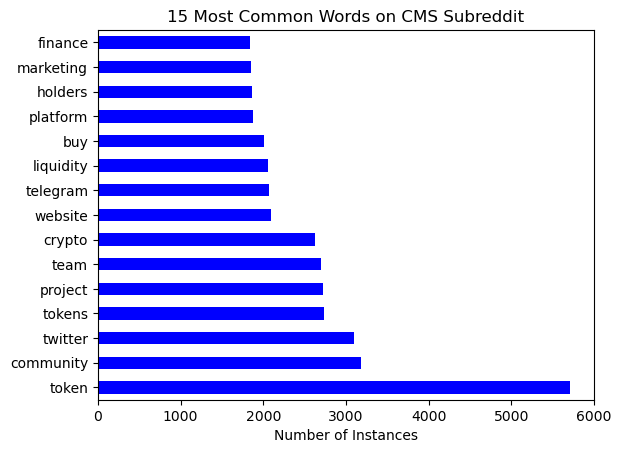

In [124]:
# Plot top occurring words 
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'blue')
plt.title('15 Most Common Words on CMS Subreddit')
plt.xlabel('Number of Instances')
plt.savefig('imgs/CMStop15words.png', dpi = 192);

In [169]:
# Top 15 bigrams in CMS subreddit
X = cms['text']
y = cms['subreddit']

# Change stop_words = 'english' with my additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words), ngram_range=(2, 2))
cvec.fit(X)

# Transform the corpus
X_cvec = cvec.transform(X)

# Convert X to dataframe
X_df = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names_out())

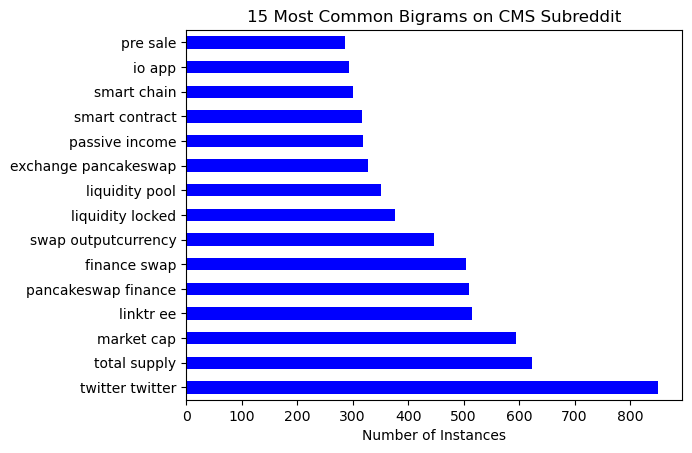

In [170]:
# Plot top occurring bigrams 
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'blue')
plt.title('15 Most Common Bigrams on CMS Subreddit')
plt.xlabel('Number of Instances')
plt.savefig('imgs/CMStop15bigrams.png', dpi = 192);

In [175]:
# Top 15 trigrams in CMS subreddit
X = cms['text']
y = cms['subreddit']

# Change stop_words = 'english' with my additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words), ngram_range=(3, 3))
cvec.fit(X)

# Transform the corpus
X_cvec = cvec.transform(X)

# Convert X to dataframe
X_df = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names_out())

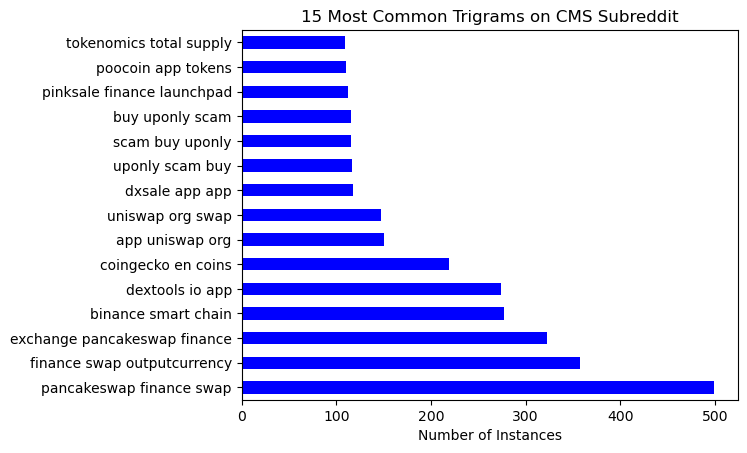

In [176]:
# Plot top occurring trigrams 
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'blue')
plt.title('15 Most Common Trigrams on CMS Subreddit')
plt.xlabel('Number of Instances')
plt.savefig('imgs/CMStop15trigrams.png', dpi = 192);

In [234]:
X = reddit['text']
y = reddit['subreddit']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [236]:
# Set up pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'nb': MultinomialNB(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [237]:
# Search over following hyperparameters
pgrid = {
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2_000, 5_000, None],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    'cvec__binary': [False, True]
}

In [238]:
# Instantiate gridsearchCV
gs = GridSearchCV(pipe, param_grid = pgrid, cv = 5, n_jobs = 8)

In [239]:
# Fit gridsearchcv to data
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'cvec__binary': [False, True],
                         'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 5000, None],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [240]:
gs.best_params_

{'cvec__binary': False,
 'cvec__max_df': 0.9,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [241]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9821518350930115
0.9751318764129616


In [242]:
preds = gs.predict(X_test)

In [243]:
confusion_matrix(y_test, preds)

array([[653,  25],
       [  8, 641]], dtype=int64)

In [244]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [253]:
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

In [255]:
tvec = TfidfVectorizer(stop_words = list(stop_words))

In [256]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), columns = tvec.get_feature_names_out())

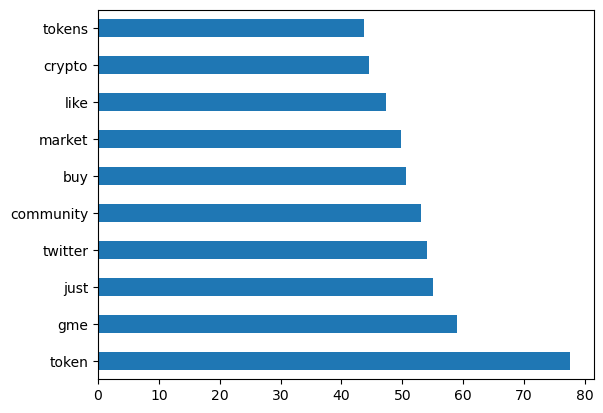

In [260]:
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [282]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [283]:
# Set up pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'nb': MultinomialNB(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [288]:
# Search over following hyperparameters
pgrid = {
    # 'tvec__binary': [False, True],
    'tvec__max_df': [0.9, 0.95],
    'tvec__max_features': [5_000, 7_000, None],
    'tvec__min_df': [1, 3, 5],
    'tvec__ngram_range': [(1, 1), (1,2)],
    'tvec__stop_words': [None, 'english']
}

In [289]:
# Gridsearch CV 
gs = GridSearchCV(pipe, param_grid = pgrid, cv = 5, n_jobs = 8)

In [290]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [5000, 7000, None],
                         'tvec__min_df': [1, 3, 5],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [291]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 5000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [292]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9819004524886877
0.9706103993971364


In [294]:
preds = gs.predict(X_test)

In [295]:
confusion_matrix(y_test, preds)

array([[655,  23],
       [ 16, 633]], dtype=int64)

In [82]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [83]:
# Setup Pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())    
])

pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rf': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_est

In [86]:
# Parameters 
pgrid = {
    'rf__n_estimators': [10, 100, 200, 500],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_features': ['sqrt', 'log2', None],
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2_000, 5_000, None],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    'cvec__binary': [False, True]    
}

In [87]:
rs = RandomizedSearchCV(pipe, pgrid, n_iter = 50, n_jobs = 8)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=50, n_jobs=8,
                   param_distributions={'cvec__binary': [False, True],
                                        'cvec__max_df': [0.9, 0.95],
                                        'cvec__max_features': [2000, 5000,
                                                               None],
                                        'cvec__min_df': [1, 2, 3],
                                        'cvec__ngram_range': [(1, 1), (1, 2)],
                                        'cvec__stop_words': [None, 'english'],
                                        'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_features': ['sqrt', 'log2',
                                                             None],
                                        'rf__n_estimators': [10, 100, 200,
                                                             500]})

In [ ]:
rs.best_params_

In [88]:
print(rs.score(X_train, y_train))
print(rs.score(X_test, y_test))

0.9989911727616646
0.981089258698941
